Theme#2 Pick a specific data science method/technique (either visualization or machine learning) and test it on multiple real-world data sets (at least three). In particular, develop a testing framework that a) prepares a data set for your method (cleaning, selection, manipulation), b) runs your method on a given data set, c) compares output across runs (and across data sets). Your "testing framework" should be a series of Python functions that accomplish these steps.

In [1]:
# insert code here
from csv import reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#Loading data function

def load_data(file):
    filename = file 
    dataset = pd.read_csv(filename)
    return dataset

In [3]:
#checking missing or null values

def missing_value(data):
    ds = data.isnull().sum()
    return ds

# Australia - Weather (Rainfall) Predicton Model

In [4]:
#Loading Australia - Weather (Rainfall Predicton) data set

file_weather = 'dataset/weatherAUS.csv'
ds_weather = load_data(file_weather)
ds_weather.shape, ds_weather.head()

((145460, 23),
          Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
 1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
 2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
 3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
 4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
 
   WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
 0           W           44.0          W  ...        71.0         22.0   
 1         WNW           44.0        NNW  ...        44.0         25.0   
 2         WSW           46.0          W  ...        38.0         30.0   
 3          NE           24.0         SE  ...        45.0         16.0   
 4           W           41.0        ENE  ...        82.0         33.0   
 
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  R

In [5]:
#Displaying columns in the dataset
ds_weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Visualization

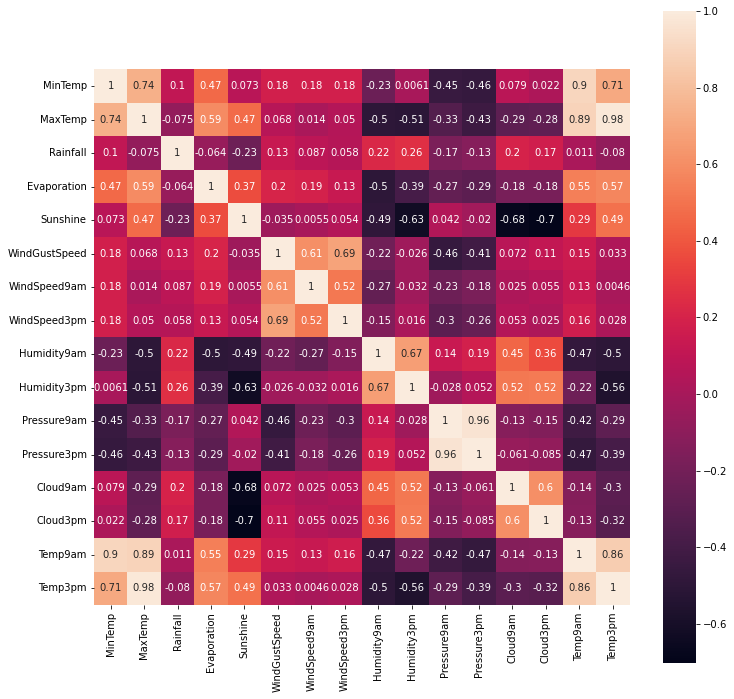

In [6]:
# Checking Correlation - to visualize the relationship between the variables for weather dataset
correlation = ds_weather.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=True, square=True) # heatmap is to provide a colored visual summary of information
plt.show()

#Interpretation from the above correlation heatmap

- MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).
- MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).
- MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).
- MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).
- MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).
- WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).
- Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).
- Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).

C:\Users\srija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


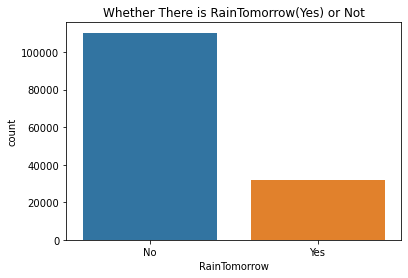

In [7]:
# Analysis of Target Feature with bar graph chart
plt.figure(figsize=(6,4))
sns.countplot(ds_weather['RainTomorrow'])  # counts the number of observations (Yes and No) in 'RainTomorrow' column 
plt.title('Whether There is RainTomorrow(Yes) or Not')
plt.show()

Target feature i.e, RainTomorrow is imbalance with a higher 'No' values than 'Yes'. 

a) Preparing the data set (cleaning, selection, manipulation)

In [8]:
# missing value count each column in Australia dataset
missing_value(ds_weather)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
#checking for missing value columns having 70% of missing values and will indicate with 'True' value

ds_weather.isnull().sum() > 0.70 * ds_weather.shape[0]

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [10]:
# Since, the columns do not have missing values more than 70%, i will not drop and column except 
#the date column as it is not needed

ds_weather = ds_weather.drop(['Date'],axis=1)

In [11]:
# Get list of categorical variables in the dataset
def categorical_col(data):
    s = (data.dtypes == "object")   # getting columns with  dtypes == "object" for categorical variables
    object_cols = list(s[s].index)
    return object_cols
object_cols = categorical_col(ds_weather) #storing only the categorical columns

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [12]:
# Filling missing values with mode (most frequent value) of the column in categorical columns

def filling_cat_na(data):
    for i in object_cols:   #looping through categorical columns
        dataset = data[i].fillna(data[i].mode()[0], inplace=True) #replacing 'NA' with mode (most frequent value) of the column
    return dataset

filling_cat_na(ds_weather)

In [13]:
# Get list of numeric variables
def numerical_col(data):
    t = (data.dtypes == "float64")     # getting columns with  dtypes == "float64" for numerical variables
    num_cols = list(t[t].index)
    return num_cols
num_cols = numerical_col(ds_weather)   #storing only the numerical columns
print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [14]:
# Filling missing values with median of the column in numerical columns

def filling_num_na(data):
    for i in num_cols:             #looping through numerical columns
        dataset = data[i].fillna(data[i].median(), inplace=True)  #replacing 'NA' with median of the column
    return dataset
filling_num_na(ds_weather)

In [15]:
# checking for missing values after data processing 
ds_weather.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [16]:
# Apply label encoder for each column with categorical or non-numerical data

def label_encoder(data):
    label_encoder = LabelEncoder()
    for i in object_cols:            #looping through categorical/non-numerical columns
        data[i] = label_encoder.fit_transform(data[i])  #transforming non-numerical labels to numerical labels
    return data
label_encoder(ds_weather)
ds_weather.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,14,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,15,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,15,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,0,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,7,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


#Split Dataset

In [17]:
#Split dataset into feature and target variables
X = ds_weather.iloc[: , :-1]
y=ds_weather.iloc[:, -1]
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int32

In [18]:
#Split australia weather dataset into training and testing dataset

X_weather_train, X_weather_test, y_weather_train, y_weather_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
X_weather_train.shape, X_weather_test.shape, y_weather_train.shape, y_weather_test.shape

((109095, 21), (36365, 21), (109095,), (36365,))

In [19]:
#Feature scaling - to scale, normalize, standardize data in range(0,1). 
#This helps to scale data of each column to a common level.

scaler = StandardScaler()
X_weather_train = scaler.fit_transform(X_weather_train)   #normalize weather training data
X_weather_test = scaler.transform(X_weather_test)    #normalize weather training data

b) Model Building

#Perceptron Classifier

In [20]:
from sklearn.linear_model import Perceptron
weather_perceptron = Perceptron(tol=1e-3, random_state=0).fit(X_weather_train, y_weather_train)
y_pred_weather_perceptron = weather_perceptron.predict(X_weather_test)
accuracy_weather_perceptron = accuracy_score(y_weather_test,y_pred_weather_perceptron)
accuracy_weather_perceptron

0.794912690774096

#Gaussian Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB
weather_gnb = GaussianNB().fit(X_weather_train, y_weather_train)
y_pred_weather_gnb = weather_gnb.predict(X_weather_test)
accuracy_score(y_weather_test,y_pred_weather_gnb)


0.8022824144094597

#Decission Tree Classifier

In [22]:
from sklearn import tree
weather_dtc = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42, criterion='gini').fit(X_weather_train, y_weather_train)
y_pred_weather_dt = weather_dtc.predict(X_weather_test)
accuracy_score(y_weather_test,y_pred_weather_dt)

0.8320912965763784

#Logistic Regression

In [23]:
#Model training with Logistic Regression classifier
# using 'saga' as dataset is large
#l2 regularization is to reduce the chance of model overfitting

reg_weather = LogisticRegression(max_iter=100,penalty='l2',C=1,solver='saga').fit(X_weather_train, y_weather_train)

In [24]:
#Model Testing
#The predict method is used to predict the actual class 
#predict_proba method can be used to infer the class probabilities (i.e. the probability that a particular data point 
#falls into the underlying classes)

y_pred_weather= reg_weather.predict(X_weather_test) 
y_proba_weather = reg_weather.predict_proba(X_weather_test)
y_pred_weather, y_proba_weather[:10]

(array([1, 0, 0, ..., 0, 0, 0]),
 array([[0.4379423 , 0.5620577 ],
        [0.98002133, 0.01997867],
        [0.74737363, 0.25262637],
        [0.87583726, 0.12416274],
        [0.56852735, 0.43147265],
        [0.96314456, 0.03685544],
        [0.99048803, 0.00951197],
        [0.59050001, 0.40949999],
        [0.78764049, 0.21235951],
        [0.44111659, 0.55888341]]))

In [25]:
#Evaluating Model Performance
#Accuracy Score - the ratio of sum of true positive and true negatives out of all the predictions made
accuracy_weather = accuracy_score(y_weather_test,y_pred_weather)
accuracy_weather

0.84446583253128

- Accuracy score - Perceptron classifier is 79.49%
- Accuracy score - Gaussian Naive Bayes classifier is 80.228%
- Accuracy score - Decission Tree classifier is 83.209%
- Accuracy score - Logistic Regression is 84.446%

Since, logistic regression gives the highest accuaracy of 84.446%, I am selecting logistic regression model for australia weather(rainfall) forcast model.

In [26]:
#Confusion Matrix - to summarize the performance classification 
cm_weather = confusion_matrix(y_weather_test,y_pred_weather)
print(cm_weather)

[[26895  1432]
 [ 4224  3814]]


In [27]:
#Classification Report
print(classification_report(y_weather_test,y_pred_weather))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.73      0.47      0.57      8038

    accuracy                           0.84     36365
   macro avg       0.80      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365



AUC Score - 0.8609623360945701


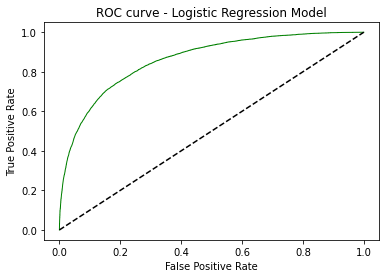

In [28]:
#ROC Curve for australia weather (rainfall) model

print("AUC Score -", roc_auc_score(y_weather_test,y_proba_weather[:,1]))

fpr, tpr, thresholds = roc_curve(y_weather_test, y_proba_weather[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve - Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#Interpretation of ROC Curve
In weather model the roc curve towards the top left corner, which indicates good model.
In weather prediction model the AUC score is 86.09%, which is a good score and indicates good model.

# Heart Disease Prediction Model

In [29]:
# Loading heart disease dataset
file_heart = 'dataset/heart.csv'
ds_heart = load_data(file_heart)

ds_heart.shape, ds_heart.head()

((303, 14),
    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
 0   63    1   3     145   233    1        0       150     0      2.3    0   
 1   37    1   2     130   250    0        1       187     0      3.5    0   
 2   41    0   1     130   204    0        0       172     0      1.4    2   
 3   56    1   1     120   236    0        1       178     0      0.8    2   
 4   57    0   0     120   354    0        1       163     1      0.6    2   
 
    caa  thall  output  
 0    0      1       1  
 1    0      2       1  
 2    0      2       1  
 3    0      2       1  
 4    0      2       1  )

In [30]:
#Displaying columns in the dataset
ds_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [31]:
# missing value count each column in heart disease dataset
missing_value(ds_heart)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

No missing values and columns has numerical values, so i will skip data processing part

# Visualization

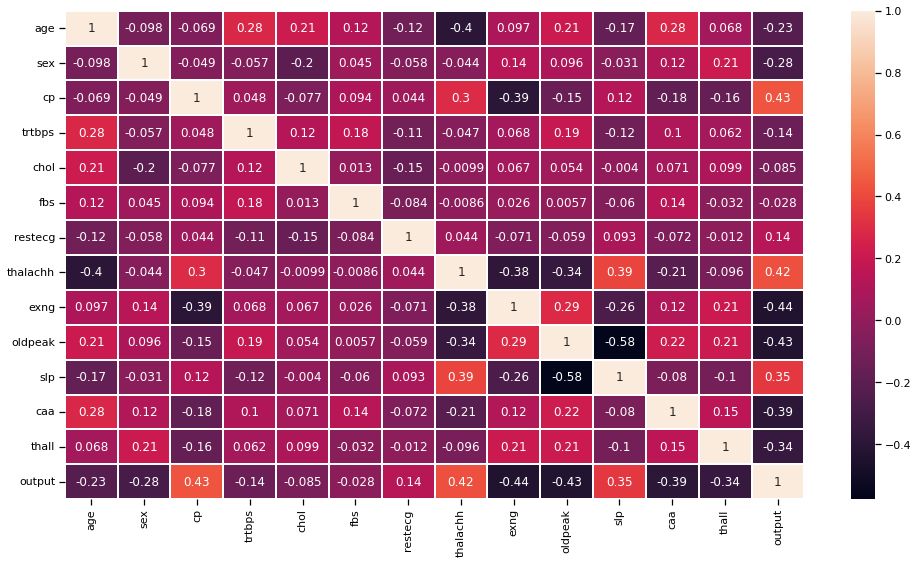

In [32]:
# Checking Correlation - to visualize the relationship between the variables for heart disease dataset

plt.figure(figsize=(14,8))
sns.set_context('notebook',font_scale = 1)
sns.heatmap(ds_heart.corr(),annot=True,linewidth =2)  # heatmap is to provide a colored visual summary of information
plt.tight_layout()

#Interpretation from the above correlation heatmap

- We can see few weaker positive and negative correlation between variables.

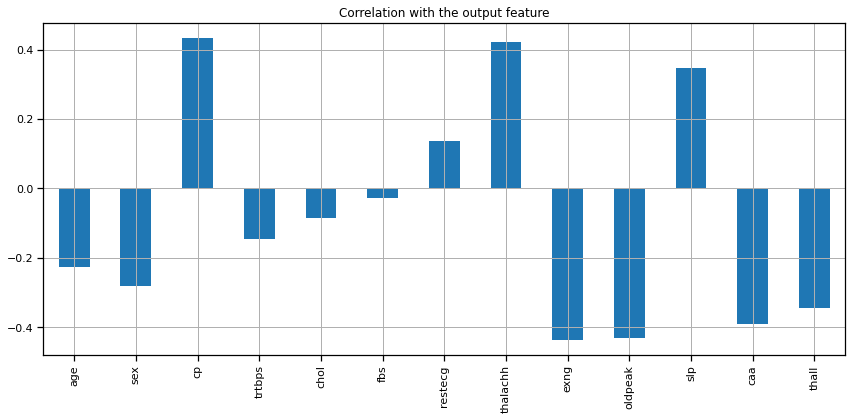

In [33]:
# Correlation of other variables with the target or 'output' variable using a bar graph with grid
sns.set_context('notebook',font_scale = 1)
ds_heart.drop('output', axis=1).corrwith(ds_heart.output).plot(kind='bar', grid=True, figsize=(12, 6), 
                                                        title="Correlation with the output feature") #adding title
plt.tight_layout()

Four feature "cp", "restecg", "thalach", "slope" are positively correlated with the output feature and other features are negatively correlated with the output feature.

C:\Users\srija\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


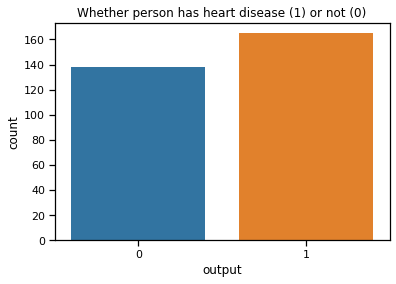

In [34]:
# Analysis of Output or the Target Feature with bar graph chart
plt.figure(figsize=(6,4))
sns.countplot(ds_heart['output'])  # counts the number of observations (1 and 0) in 'output' column
plt.title('Whether person has heart disease (1) or not (0)') #adding title
plt.show()

Target feature i.e, output is balance with the ratio between '0' and '1' is much less than 1.5 

In [35]:
#Split dataset into feature and target column
X = ds_heart.iloc[: , :-1]
y=ds_heart.iloc[:, -1]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [36]:
#Splitting dataset into training and testing dataset

X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X,y, test_size = 0.20, random_state = 42)
X_heart_train.shape, X_heart_test.shape, y_heart_train.shape, y_heart_test.shape

((242, 13), (61, 13), (242,), (61,))

Building Model

#Support Vector Classifier

In [37]:
#l2 Regulizer on SVM
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
heart_svm = make_pipeline(StandardScaler(), SVC(gamma='auto', C=1.0,kernel='rbf',max_iter=-1)).fit(X_heart_train, y_heart_train)
y_pred_heart_svm = heart_svm.predict(X_heart_test)
accuracy_heart_svm =accuracy_score(y_heart_test,y_pred_heart_svm)
accuracy_heart_svm

0.8688524590163934

#Decission Tree Classifier

In [38]:
from sklearn import tree
heart_dtc = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42, criterion='gini').fit(X_heart_train, y_heart_train)
y_pred_heart_dtc = heart_dtc.predict(X_heart_test)
accuracy_heart_dtc = accuracy_score(y_heart_test,y_pred_heart_dtc)
accuracy_heart_dtc

0.8524590163934426

#K-Nearest Neighbour Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
heart_neigh = KNeighborsClassifier(n_neighbors=9).fit(X_heart_train, y_heart_train)
y_pred_knn = heart_neigh.predict(X_heart_test)
accuracy_heart_knn = accuracy_score(y_heart_test,y_pred_knn)
accuracy_heart_knn

0.6885245901639344

#Gaussian Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
heart_gnb = GaussianNB().fit(X_heart_train, y_heart_train)
y_pred_heart_gnb = heart_gnb.predict(X_heart_test)
accuracy_heart_gnb = accuracy_score(y_heart_test,y_pred_heart_gnb)
accuracy_heart_gnb

0.8688524590163934

#Logistic Regression

In [41]:
#Model training with Logistic Regression classifier
# using 'liblinear' as dataset is small
reg_heart= LogisticRegression(max_iter=100,penalty='l2',C=1,solver='liblinear').fit(X_heart_train,y_heart_train)

In [42]:
#Model Testing
#The predict method is used to predict the actual class 
#predict_proba method can be used to infer the class probabilities (i.e. the probability that a particular data point 
#falls into the underlying classes)

y_pred_heart= reg_heart.predict(X_heart_test)
y_proba_heart = reg_heart.predict_proba(X_heart_test)
y_pred_heart, y_proba_heart[:10]

(array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64),
 array([[0.92211654, 0.07788346],
        [0.26074991, 0.73925009],
        [0.14464953, 0.85535047],
        [0.97158146, 0.02841854],
        [0.0605492 , 0.9394508 ],
        [0.08743411, 0.91256589],
        [0.41091298, 0.58908702],
        [0.99824888, 0.00175112],
        [0.99495667, 0.00504333],
        [0.52992319, 0.47007681]]))

In [43]:
#Evaluating Model Performance
#Accuracy Score - the ratio of sum of true positive and true negatives out of all the predictions made
accuracy_heart = accuracy_score(y_heart_test,y_pred_heart)
accuracy_heart

0.8688524590163934

- Accuracy score - Support Vector Classfier is 86.885%
- Accuracy score - Decission Tree classifier is 85.245%
- Accuracy score - K-Nearest Neighbour classifier is 68.85%
- Accuracy score - Gaussian Naive Bayes classifier is 86.885%
- Accuracy score - Logistic Regression is 86.885%

Logistic regression, support vector classifier, Gaussian Naive Bayes gave highest accuaracy of 86.885%. Since, I have selected logistic regression for weather dataset, i am selecting logistic regression for heart dataset.

In [44]:
#Confusion Matrix - to summarize the performance classification 
cm_heart = confusion_matrix(y_heart_test,y_pred_heart)
print(cm_heart)

[[25  4]
 [ 4 28]]


In [45]:
#Classification Report
print(classification_report(y_heart_test,y_pred_heart))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



AUC Score - 0.927801724137931


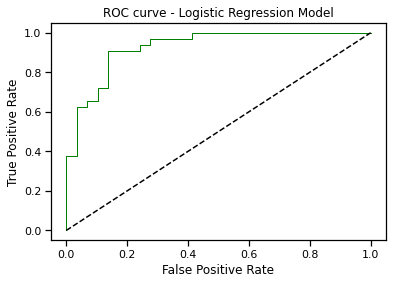

In [46]:
#ROC Curve

print("AUC Score -", roc_auc_score(y_heart_test,y_proba_heart[:,1]))

fpr, tpr, thresholds = roc_curve(y_heart_test, y_proba_heart[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve - Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

#Interpretation of ROC Curve

In heart prediction model roc curve is towards the top left corner, which indicates a good model
In heart prediction model the AUC score is 92.78%, which is a better.

# MNIST Dataset Prediction Model

In [47]:
from sklearn.datasets import load_digits

#Loading digit dataset from sklearn
digits = load_digits()
print("Digits Dataset Size : ", digits.data.shape, digits.target.shape, digits.images.shape) 

Digits Dataset Size :  (1797, 64) (1797,) (1797, 8, 8)


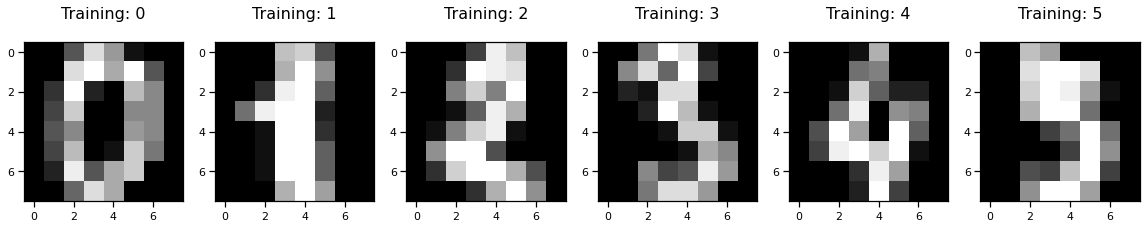

In [48]:
#visualization of sample data
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:6], digits.target[0:6])):   # display 6 sample data
    plt.subplot(1, 6, index + 1)   #subplot of 6 sample data
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 16);

In [49]:
#splitting dataset into training and testing dataset

X_digit_train,X_digit_test,y_digit_train,y_digit_test=train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)
X_digit_train.shape,X_digit_test.shape,y_digit_train.shape,y_digit_test.shape

((1347, 64), (450, 64), (1347,), (450,))

Building Model

#Decision Tree Classifier

In [50]:
from sklearn import tree
digit_dtc = tree.DecisionTreeClassifier(max_depth = 4, random_state = 42, criterion='gini').fit(X_digit_train,y_digit_train)
y_pred_digit_dtc = digit_dtc.predict(X_digit_test)
accuracy_digit_dtc = accuracy_score(y_digit_test,y_pred_digit_dtc)
accuracy_digit_dtc

0.5333333333333333

#Perceptron Classifier

In [51]:
from sklearn.linear_model import Perceptron
digit_perceptron = Perceptron(tol=1e-3, random_state=0).fit(X_digit_train,y_digit_train)
y_pred_digit_perceptron = digit_perceptron.predict(X_digit_test)
accuracy_digit_perceptron = accuracy_score(y_digit_test,y_pred_digit_perceptron)
accuracy_digit_perceptron

0.9266666666666666

#Gaussian Naive Bayes classifier

In [52]:
from sklearn.naive_bayes import GaussianNB
digit_gnb = GaussianNB().fit(X_digit_train,y_digit_train)
y_pred_digit_gnb = digit_gnb.predict(X_digit_test)
accuracy_digit_gnb = accuracy_score(y_digit_test,y_pred_digit_gnb)
accuracy_digit_gnb

0.8333333333333334

In [53]:
# Model training with Logistic Regression classifier
# solver 'saga' for multiclass classifier
clf=LogisticRegression(fit_intercept=True,multi_class='auto',penalty='l2',solver='saga',max_iter=100,C=50).fit(X_digit_train,y_digit_train)

C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [54]:
#Model Testing
#The predict method is used to predict the actual class 
#predict_proba method can be used to infer the class probabilities (i.e. the probability that a particular data point 
#falls into the underlying classes)
y_pred_mnist = clf.predict(X_digit_test)
y_proba_mnist = clf.predict_proba(X_digit_test)

y_pred_mnist[:10], y_proba_mnist

(array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5]),
 array([[1.77634206e-10, 1.00158488e-08, 9.99999836e-01, ...,
         6.88026395e-08, 2.66047986e-09, 7.54174420e-11],
        [3.12521908e-06, 8.69558964e-04, 7.17806870e-04, ...,
         4.57220556e-07, 9.49754567e-01, 2.27671088e-05],
        [2.01013552e-15, 1.45484025e-08, 9.99999970e-01, ...,
         4.33084921e-11, 5.79044188e-11, 2.15548980e-13],
        ...,
        [1.19915366e-08, 4.29443544e-10, 4.67446298e-12, ...,
         1.16223610e-11, 2.21304518e-08, 1.11812597e-06],
        [2.17456614e-10, 9.26194797e-01, 8.67761016e-06, ...,
         3.64109569e-08, 1.62225006e-02, 1.64900757e-08],
        [5.52615454e-07, 2.44935768e-11, 1.75754962e-10, ...,
         3.04387040e-09, 4.49941652e-06, 9.99815737e-01]]))

In [55]:
#Evaluating Model Performance
#Accuracy Score - the ratio of sum of true positive and true negatives out of all the predictions made
accuracy_digit=accuracy_score(y_digit_test,y_pred_mnist)
accuracy_digit

0.9622222222222222

- Accuracy score - Decission Tree classifier is 53.33%
- Accuracy score - Perceptron Classifier Classfier is 92.66%
- Accuracy score - Gaussian Naive Bayes classifier is 83.33%
- Accuracy score - Logistic Regression is 96.22%

Since, logistic regression gives the highest accuracy, I am selecting logistic regression model for MNIST digit classification

In [56]:
#classification Report
print(classification_report(y_digit_test,y_pred_mnist))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.95      0.97        44
           3       0.96      0.98      0.97        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.98      0.98        48
           8       0.94      0.92      0.93        48
           9       0.94      0.96      0.95        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



In [57]:
#Confusion Matrix - to summarize the performance classification 
cm_mnist = confusion_matrix(y_digit_test,y_pred_mnist,labels = clf.classes_)
print(cm_mnist)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  1  1]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0  0  1 45]]


c) Compares output across dataset

C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


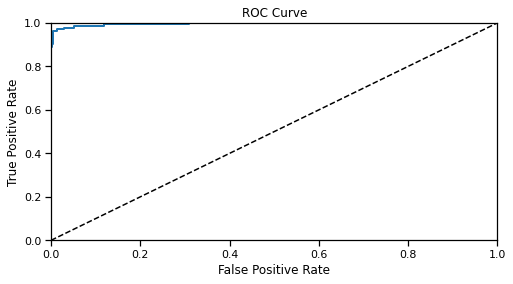

In [58]:
#roc_auc_score(y_digit_test,y_proba_mnist[:,1])
from sklearn.model_selection import cross_val_predict

y_digit_train_5 = (y_digit_train == 5)
y_scores = cross_val_predict(clf, X_digit_train, y_digit_train_5, cv=3, method='decision_function')

fpr, tpr, thresholds = roc_curve(y_digit_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

plt.figure(figsize=(8,4)); 
plot_roc_curve(fpr, tpr)
plt.show();

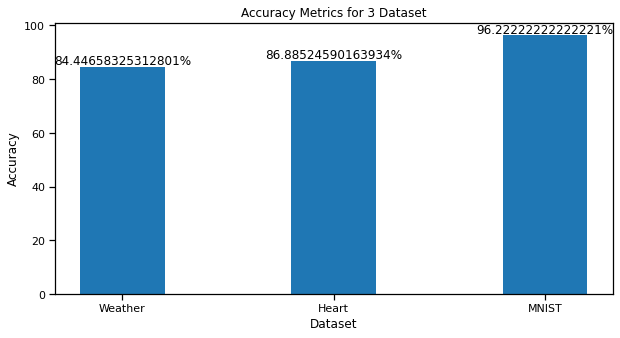

In [59]:
# Comparing Accuracy percentage of 3 datasets with bar chart
#Accuracy Score - the ratio of sum of true positive and true negatives out of all the predictions made
data = {'Weather':(accuracy_weather*100), 'Heart':(accuracy_heart*100), 'MNIST':(accuracy_digit*100)}

dataset = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
graph = plt.bar(dataset, accuracy, width = 0.4)
 
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Accuracy Metrics for 3 Dataset")
for p in graph:
    height = p.get_height()
    plt.text(x=p.get_x() + p.get_width() / 2, y=height+.90, s="{}%".format(height), ha='center')
plt.show()

In [60]:
#Comparing classification report(Accuracy, Precision, F1 Score, Recall) for 3 dataset
print("Weather Model")
print(classification_report(y_weather_test,y_pred_weather))
print("Heart Model")
print(classification_report(y_heart_test,y_pred_heart))
print("MNIST digit")
print(classification_report(y_digit_test,y_pred_mnist))

Weather Model
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     28327
           1       0.73      0.47      0.57      8038

    accuracy                           0.84     36365
   macro avg       0.80      0.71      0.74     36365
weighted avg       0.83      0.84      0.83     36365

Heart Model
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

MNIST digit
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.95      0.97        44
           3       0.96      0.98      0.97        45
           4       0.97      0.97    

#Classification Report Interpretation
- The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.
- WEATHER MODEL: The F1 score is 74% (macro) and 83% (weighted), which indicates good model.
- HEART MODEL: The F1 score is 87%, which indicates a better model
- MNIST MODEL : The F1 score is 96%, which indicates excellent model.

C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\srija\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


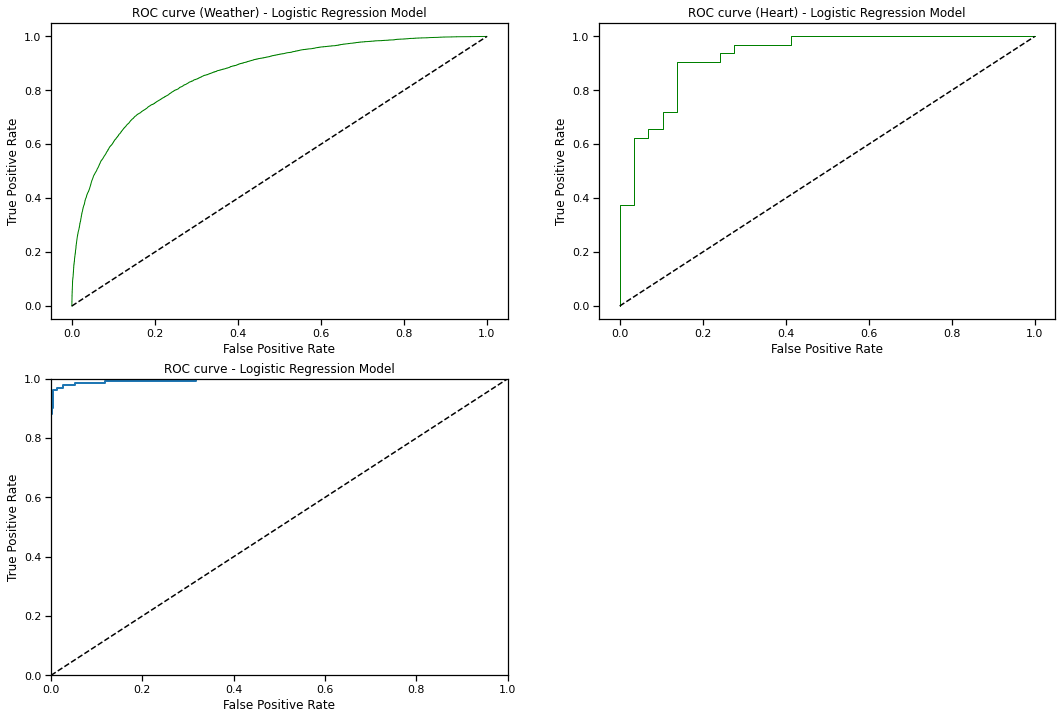

In [61]:
#Subplot for comparing ROC Curve for 3 dataset
plt.figure(figsize=(18,12))
#ROC Curve - weather dataset
fig1 = plt.subplot(2,2,1)    # The plot has 2 row, 2 columns and position of the subplot
fpr, tpr, thresholds = roc_curve(y_weather_test, y_proba_weather[:,1])
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
curve_title = 'ROC curve (Weather) - Logistic Regression Model'
fig1.title.set_text(curve_title)

#ROC curve - heart disease dataset
fig2 = plt.subplot(2,2,2)
fpr, tpr, thresholds = roc_curve(y_heart_test, y_proba_heart[:,1])
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
curve_title = 'ROC curve (Heart) - Logistic Regression Model'
fig2.title.set_text(curve_title)

# ROC Curve - MNIST digit
# I have used binary digit prediction to visualize the ROC curve and AUC score
y_digit_train_5 = (y_digit_train == 5) # selecting digit 5 for binary classification
X_digit_test_5 = (y_digit_test == 5)
y_scores = cross_val_predict(clf, X_digit_train,y_digit_train_5,cv=3, method='decision_function') #using cross validation model 
fig3 = plt.subplot(2,2,3)
fpr, tpr, thresholds = roc_curve(y_digit_train_5, y_scores) # roc curve function on digit 5 
plt.plot(fpr, tpr, linewidth=2, label=label)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
all_sample_title = 'ROC curve - Logistic Regression Model'
fig3.title.set_text(all_sample_title) 

In [62]:
print(roc_auc_score(y_weather_test,y_proba_weather[:,1]))
print(roc_auc_score(y_heart_test,y_proba_heart[:,1]))
print(roc_auc_score(y_digit_train_5, y_scores))

0.8609623360945701
0.927801724137931
0.9957795523618511


#ROC Curve and AUC score Interpretation
- Roc curve is predicting the probability of a binary outcome. A plot of the false positive rate (x-axis) versus the true positive rate (y-axis) with a threshold values between 0.0 and 1.0

- WEATHER MODEL: The roc curve is towards the top left corner, with AUC score 86.096%, which indicates good model.
- HEART MODEL: In heart prediction model, the roc curve is more towards the top left corner, with AUC score 92.78% which indicates a better model
- MNIST MODEL : The roc curve is towards the extreme top left corner, with AUC score 99.577%, which indicates excellent model.

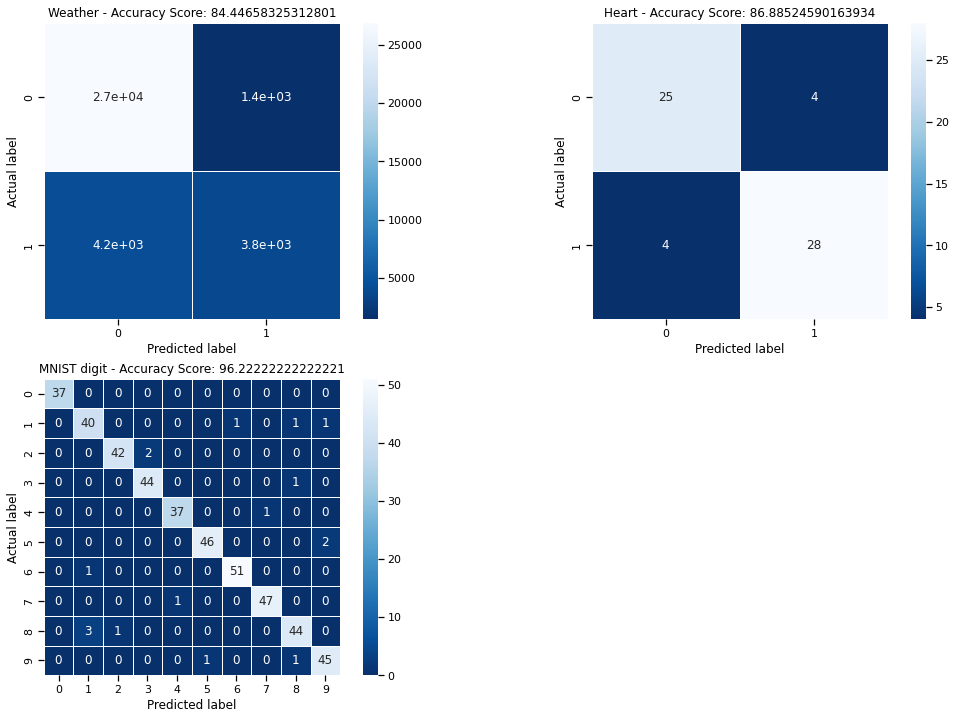

In [63]:
#Subplot for comparing confusion matrix visualization for 3 dataset
plt.figure(figsize=(18,12))
#weather
fig1 = plt.subplot(2,2,1)    # The plot has 2 row, 2 columns and position of the subplot
sns.heatmap(cm_weather, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Weather - Accuracy Score: {0}'.format(accuracy_weather*100)
fig1.title.set_text(all_sample_title)

#heart
fig2 = plt.subplot(2,2,2)
sns.heatmap(cm_heart, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Heart - Accuracy Score: {0}'.format(accuracy_heart*100)
fig2.title.set_text(all_sample_title)

#MNIST
fig3 = plt.subplot(2,2,3)
sns.heatmap(cm_mnist, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'MNIST digit - Accuracy Score: {0}'.format(accuracy_digit*100)
fig3.title.set_text(all_sample_title) 

#Interpretation - Confusion Matrix 

- WEATHER MODEL: The model shows, 27X10^3 + 3.8 X 10^3 = 30.8 X 10^3 correct prediction and 4.2 X 10^3+1.4X 10^3 = 5.6 X 10^3 wrong prediction
- HEART MODEL: The model shows, 25+28= 53 correct prediction and 4+4 = 8 wrong prediction
- MNIST MODEL : The model shows, 37+40+43+44+37+46+51+47+44+45 = 434 correct prediction and 14 wrong prediction